In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [2]:
with open('/content/data.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [4]:
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [5]:
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [6]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [7]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 100)           820000    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 8200)              1238200   
                                                                 
Total params: 2208800 (8.43 MB)
Trainable params: 2208800 (8.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
histmod = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
3010/3010 [==============================] - 208s 68ms/step - loss: 6.2443 - accuracy: 0.0760
Epoch 2/100
3010/3010 [==============================] - 205s 68ms/step - loss: 5.5041 - accuracy: 0.1246
Epoch 3/100
3010/3010 [==============================] - 202s 67ms/step - loss: 5.1213 - accuracy: 0.1469
Epoch 4/100
3010/3010 [==============================] - 201s 67ms/step - loss: 4.7916 - accuracy: 0.1645
Epoch 5/100
3010/3010 [==============================] - 199s 66ms/step - loss: 4.4851 - accuracy: 0.1821
Epoch 6/100
3010/3010 [==============================] - 201s 67ms/step - loss: 4.1996 - accuracy: 0.2025
Epoch 7/100
3010/3010 [==============================] - 198s 66ms/step - loss: 3.9271 - accuracy: 0.2272
Epoch 8/100
3010/3010 [==============================] - 199s 66ms/step - loss: 3.6680 - accuracy: 0.2563
Epoch 9/100
3010/3010 [==============================] - 197s 65ms/step - loss: 3.4236 - accuracy: 0.2901
Epoch 10/100
3010/3010 [======================

In [12]:
import pickle

model.save('sentiment_model.h5')
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0, 0.5, 'Accuracy')

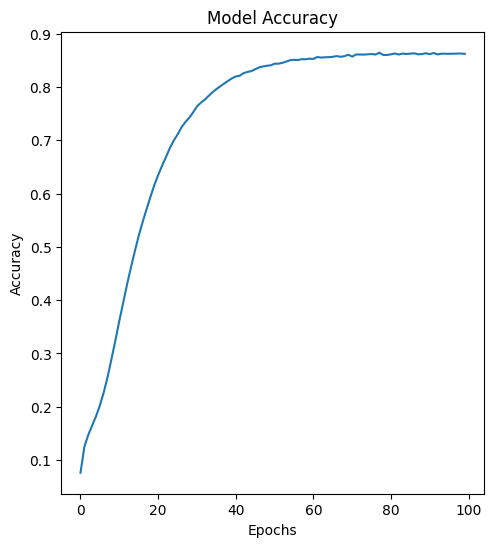

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(histmod.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

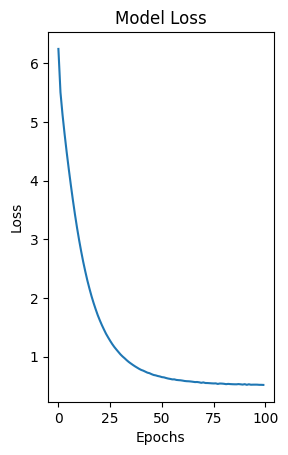

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(histmod.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [13]:
def generate_next_words(halftext, model, tokenizer, max_sequence_len, next_words=5):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([halftext])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        halftext += " " + output_word
    return halftext

In [ ]:
halftext_input = "Stop there"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=5)
print(generated_text)

1/1 [==============================] - 0s 24ms/step
Stop there in ' said i believe


In [ ]:
halftext_input = "Today i will not go to my university"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=5)
print(generated_text)

1/1 [==============================] - 0s 97ms/step
Today i will not go to my university night for my father was


In [ ]:
halftext_input = "There was a murderer in that room"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=5)
print(generated_text)

1/1 [==============================] - 0s 42ms/step
There was a murderer in that room with the company and not


In [11]:
from tensorflow.keras.models import load_model
import pickle

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

model = load_model('sentiment_model.h5')

In [12]:
def generate_next_words(halftext, model, tokenizer, max_sequence_len, next_words=5):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([halftext])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        halftext += " " + output_word
    return halftext

In [31]:
halftext_input = "How was"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=3)
print(generated_text)

1/1 [==============================] - 0s 22ms/step
How was knocked forth paleness


In [ ]:
halftext_input = "My name"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=3)
print(generated_text)

1/1 [==============================] - 0s 21ms/step
My name is sherlock holmes


In [43]:
halftext_input = "I could not help"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=5)
print(generated_text)

1/1 [==============================] - 0s 69ms/step
I could not help laughing at the ease in


In [44]:
halftext_input = "I could not sleep"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=5)
print(generated_text)

1/1 [==============================] - 0s 38ms/step
I could not sleep that night a vague feeling


In [45]:
halftext_input = "At Waterloo"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=10)
print(generated_text)

1/1 [==============================] - 0s 55ms/step
At Waterloo we were fortunate in catching a train for leatherhead they


In [46]:
halftext_input = "I'm tired"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=5)
print(generated_text)

1/1 [==============================] - 0s 30ms/step
I'm tired in that have i had


In [50]:
halftext_input = "It was"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=5)
print(generated_text)

1/1 [==============================] - 0s 47ms/step
It was most suggestive said holmes it


In [32]:
halftext_input = "I see"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=5)
print(generated_text)

1/1 [==============================] - 0s 22ms/step
I see idea lascar overtaken £1100 disconnected


In [33]:
halftext_input = "What will she do"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=5)
print(generated_text)

1/1 [==============================] - 0s 130ms/step
What will she do  whatever tobacconist marked overtaken guard


In [35]:
halftext_input = "He was a large man with rounded"
generated_text = generate_next_words(halftext_input, model, tokenizer, max_sequence_len, next_words=5)
print(generated_text)

1/1 [==============================] - 0s 23ms/step
He was a large man with rounded braced featureless seldom 'fritz jumped
